# AlexNet (2012)

Alex Krizhevsky, Ilya Sutskever y Geoffrey E. Hinton. Imagenet classificatoin with deep convolution neural networks. 

Ganaron el ILSVRC: Iamge Large Scale Visual Recognition Challenge.

Fue de las primeras que uso GPU (usaron una arqutectura con 2 GPUs). 

El concurso constaba de 1.2 millones de imagenes de entrenamiento y 50 mil imagenes de validacion y y 150 mil imagenes de prueba. ESta fue la primera red a gran escala para el procesesamiento de imagenes. 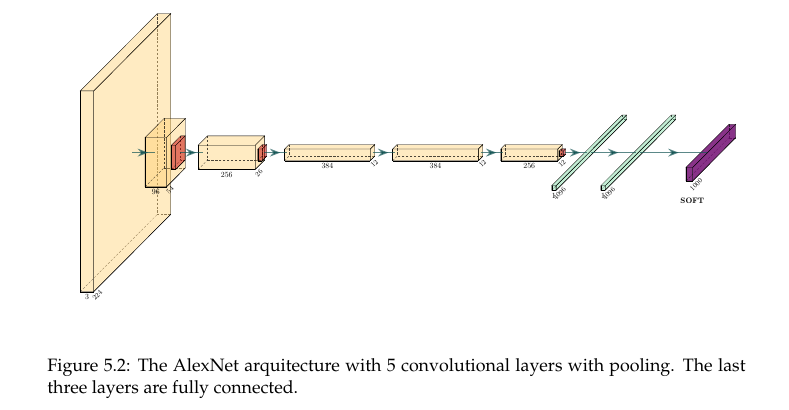

Hagamos una compracion con la anterior antes de describirla en mas detalle.

* La LetNet tiene 3 capas convolucionales. La AlexNet tiene 5
* Funciones de activacion: La AlexNet usa ReLU (nosotros usamos ReLU en la implementacion de la clase anterior pero el trabajo original de 1998 usao tanh). 
* Pooling: LetNet uso AveragePooling mientrras que la AlexNet usa el MaxPooling


* Entrada y convolucion de la primera capa. La entrada tiene pixeles (recortada) $224 \times 224 \times 3$. Esta convolucion no tiene padding y el stride es $s=4$.

    La salidad tendria en una de sus dimensiones cuadradas: $(224-11)/4 + 1 = 54.25$ se trunca a $54$.

    Se tiene 96 filtros de salida.  O sea que la salida tiene un tamano de $54 \times 54 \times 96$.
El numero de parametros:


$$ \text{learning parameters} = (11 \times 11 \times 3+1) \times 96 = 34944 $$

* MaxPooling: Kernel es de $3 \times 3$, stride $s=2$. Como
$$(54-3)/2+1 + 26.5$$. Truncando tenemos que la salida despues de pooling $26 \times 26 \times 96 = 614656$.

* Convolucion 2: El kernel es de $5 \times 5$, strides $s=2$, pad=$2$ , Entonces como $ (26-5+ 2(2))/1 +1= 26 $. Filtros de salidas 256. El tamano de salidas es $26 \times 26 \times 256$

$$ \text{parametros de aprendizaje} = (5 \times 5 \times 96+1) \times 256 = $$

* MaxPooling: Kernel de $3 \times 3$, stride $s=2$. La salida es
$(26-3)/2 +1 = 12$. La salida es ahora de $12 \times 12 \times 256$.



* Convolucion 3: Se usa un kernel de $3 \times 3$ con stride $s=1$, pad$=1$, y 384 filtros. Tamano de salida en la primera dimension ($x$): $( (12-3+2)/1 +1 = 12$ (con el pading que igual pero de 384 filtros de salida). La salida seria $12 \times 12 \times 384$.  Los parametros que se usan

$$\text{numero de parametros} = (3 \times 3 \times 256 +1) \times 384 = 885120  $$

* Convolucion 4: Kernel de $3 \times 3$, con stride $s=1$, padding pad$=1$. Filtros de salida 384. Tamano de salida dimension $x$: $(12-3+2)/1=12$. La salida es entonces de 
$12 \times 12 \times 384$. 

$$ \text{numero (learning)  de parametros}  = (3 \times 3 \times 384 +1) \times 384 = 1327488 $$

* Convolucion 5: Kernel de $3 \times 3$, stride $s=1$, padding pad=$1$, filtros de salida 256. La salida de la primera dimension tiene tamano $(12 - 3 + 2)/1 +1= 12$. La salida tiene $12 \times 12 \times 256$, 

$$ \text{numero de parametros (entrenables): } (3 \times 3 \times 384 + 1) \times 256 = 884992$$
con una activacion ReLU. 

* MaxPooling de kernel $3 \times 3$ con stride $s=2$, no padding.
$(12 - 3)/2 +1 = 5.5$. Se trunca a 5 y obtenemos un tamano de
salide de $5 \times 5 \times 256$. 

* Regularizacion Dropout: rata=0.5 (se elilimana el 50 por ciento de los nodos y sus conexiones para proposito de reducir parametros). 

* Flatten: Produce $5\times 5 \times 256 = 6400$.

* Densa (fully connected): Entran 6400 y salen 4096. Dropout 0.5.
$$\text{# parametros} = (6400+1) \times 4096 = 26218496  $$

* Otra Densa (fully connected): Entran 4096 salen 4096. El total de parametros es 

$$ \text{# parametros} = (4096+1)*4096=16781312$$

* La ultima capa es un softmax con 1000 salidas (para nostros con 17).

Con 1000 salidas tendriamos los siguientes parametros

$$ \text{# parametros} = (4096+1)*1000 = 4097000.






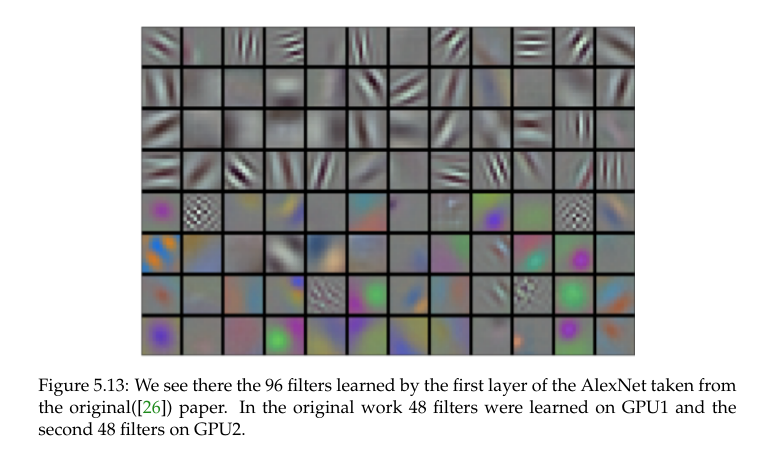

In [1]:
# implementacion en keras
# importamos librerias
import tensorflow as tf
tf.__version__

'2.8.0'

In [2]:
import keras
keras.__version__

'2.8.0'

In [6]:
# importe librerias
!pip install tflearn
from tflearn.datasets import oxflower17
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv2D, Dropout, MaxPooling2D
from keras.layers import BatchNormalization, Activation, Flatten, Dense


In [7]:
# cargamos los datos
X,Y = oxflower17.load_data(one_hot=True)

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [9]:
# miremos las dimensiones de los datos
X.shape, Y.shape

((1360, 224, 224, 3), (1360, 17))

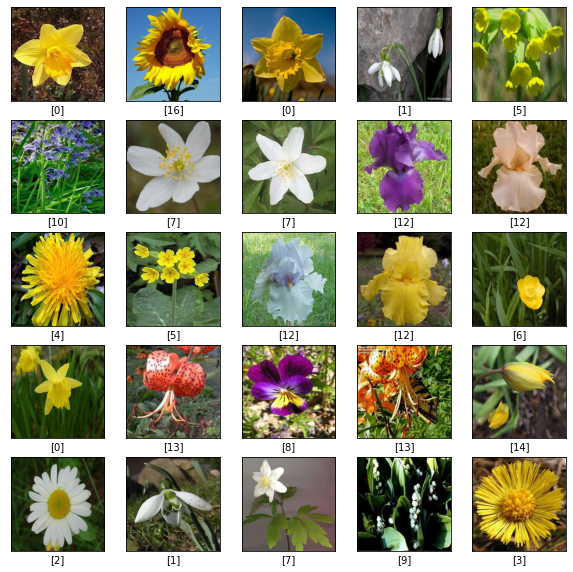

In [26]:
# miremos algunos datos (images)
import matplotlib.pyplot as plt
import numpy
import numpy as np
plt.figure(figsize=(10,10))


# grafique 25 (5 x 5) imagenes
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i])
    plt.xlabel(str(numpy.where( Y[i] == 1)[0]))

In [41]:
# crear modelo
model = Sequential()

model.add( Conv2D( filters=96, kernel_size=(11,11,), input_shape=(224, 224,3),
                  strides=(4,4), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# maxpooling
model.add(MaxPooling2D( (3,3), strides=(2,2), padding='valid'))

# segunda capa convolucional
model.add(Conv2D (filters=256, kernel_size=(5,5), strides=(1,1), padding='same',
                  activation='relu', kernel_initializer='he_normal'))

model.add(BatchNormalization())

# maxpooling
model.add(MaxPooling2D( (3,3), strides=(2,2), padding='valid'))

# tercerca capa convolutiva
model.add(Conv2D( filters=384, kernel_size=(3,3), strides=(1,1), padding='same',
                 activation='relu', kernel_initializer='he_normal'))

model.add(BatchNormalization())

# cuarta capa convolucional
model.add(Conv2D( filters=384, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())

# quinta capa convolucional
model.add(Conv2D( filters=256, kernel_size=(3,3), padding='same',
                 activation='relu', kernel_initializer='he_normal'))

model.add(BatchNormalization())
model.add(MaxPooling2D( (3,3), strides=(2,2), padding='valid'))

model.add(Flatten())

# primera densa
model.add(Dense(4096))
model.add(BatchNormalization())

# Dropout
model.add(Dropout(0.5))
model.add(Activation('relu'))

# segunda densa
model.add(Dense(4096))
model.add(BatchNormalization())

#Dropout
model.add(Dropout(0.5))
model.add(Activation('relu'))


# output softmax
model.add(Dense(17))
model.add(BatchNormalization())
model.add(Activation('softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_43 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization_41 (Bat  (None, 54, 54, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 26, 26, 96)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_42 (Bat  (None, 26, 26, 256)      1024      
 chNormalization)                                                
                                                     

In [42]:
from keras.backend import learning_phase
# compilar modelo
model.compile ( optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
), loss='categorical_crossentropy', metrics=['accuracy'])

In [46]:
# entrenamiento
history = model.fit( X, Y, batch_size=64, epochs=11, verbose=1, validation_split=0.2, shuffle=True)

Train on 1088 samples, validate on 272 samples
Epoch 1/11
1088/1088 [==============================] - 3s 3ms/sample - loss: 0.0557 - acc: 0.9991 - val_loss: 0.7847 - val_acc: 0.8125
Epoch 2/11
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.0512 - acc: 1.0000 - val_loss: 0.7551 - val_acc: 0.8199
Epoch 3/11
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.0514 - acc: 1.0000 - val_loss: 0.7392 - val_acc: 0.8125
Epoch 4/11
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.0457 - acc: 1.0000 - val_loss: 0.7332 - val_acc: 0.8199
Epoch 5/11
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.0467 - acc: 1.0000 - val_loss: 0.7183 - val_acc: 0.8309
Epoch 6/11
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.0431 - acc: 1.0000 - val_loss: 0.7151 - val_acc: 0.8272
Epoch 7/11
1088/1088 [==============================] - 2s 1ms/sample - loss: 0.0426 - acc: 1.0000 - val_loss: 0.7210 - val_acc: 0.8272
E

# Red VGGNet (2014)
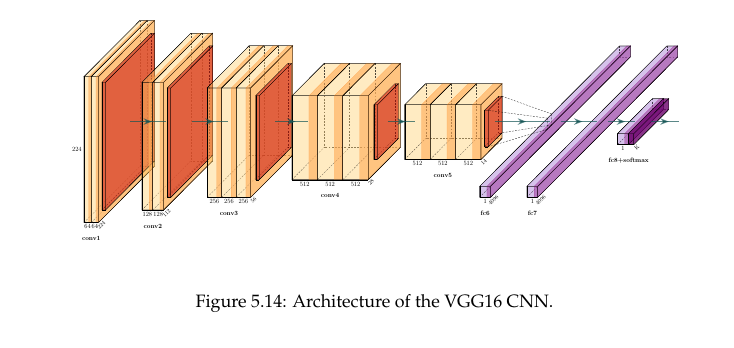

VGG= Visual Geometry Group: Oxford University.
Gano el primer y segundo lugar en ImageNet challenge 2014. Con 92.7% top accuracy.

Los autores tiene su publicacion. : Karen Simonyan y Andrew Zisserman (2015). 

Todas las convoluciones son de $3 \times 3$ (kernels). Stride $s=1$ y padding "same" (preserva el tamano entre la entrada y la salida). Todos los pooling son MaxPooling con tamanos $2 \times 2$ y stride $s=2$.

Hagamos la descripcion aca y la implemantacion en la proxima clase.

Todas las activaciones son ReLU (excepto por la ultima que es softmax). Se aplican luego de cada
convolucion. 

A partir de este momento no contamos parametros ni encontramos
dimensiones. 

* Capa de entrada y primera convolucion: Salida de convolucion 64 filtros, la entrada es $224 \times 224 \times 3$. A esto 
le sigue un MaxPooling. 

* Segunda capa convolucional: Filtros de salida 128 , seguida por MaxPooling. 

* Tercera capa: Tres convoluciones  cada una con 256 filtros, sesguida de MaxPooling

* Cuarta capa: Tres convoluciones con 512 filtros de salida, seguida por MaxPooling. 

* Quinta capa convolucional: Tres convoluciones tambien con 512, seguida de MaxPooling. 

* Flattening: Se vectorizan en una "tira" de 4096 componentes. 

* Fully connected (densa). Se conectan las 4096 componentes (neuronas) con otras 4096 componentes. 

* Fully connected con una funcion de activacion softmax. En el concurso se hace con 1000 salidas. 
Nosotros usamos 17 (las flores).
